In [2]:
import pandas as pd
import numpy as np

In [17]:
ENABLE_LOGGING = True


def log(data, message="\n"):
    if ENABLE_LOGGING:
        print(message)
        print("\t")
        print(data)

In [3]:
from sklearn.preprocessing import LabelBinarizer


def one_hot_encode(x):
    """
    One hot encode a list of sample labels. Return a one-hot encoded vector for each label.
    : x: List of sample Labels
    : return: Numpy array of one-hot encoded labels
    """
    # http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html#sklearn.preprocessing.LabelBinarizer
    lb = LabelBinarizer()
    lb.fit(range(max(x)+1))
    b = lb.transform(x)
    return b

In [4]:
file = r'data/fer2013.csv'
df = pd.read_csv(file)

# Converting space separated pixels to int array


def string_to_int_array(item):
    return [int(p) for p in item.split()]


def get_X_and_y(df):
    X = [string_to_int_array(item) for item in df.iloc[:, 1].values]
    X = np.array(X) / 255.0
    y = np.array(df.iloc[:, 0].values)
    y = np.array(one_hot_encode(y))
    y = y.astype(np.float32, copy=False)
    return X, y


def get_training_set(data):
    not_class1 = data.loc[data['emotion'] != 1]
    class1 = data.loc[data['emotion'] == 1]
    class1_aug = class1
    # This is done to handle the class imbalance for emotion 1 which has only ~500 pics
    for i in range(11):
        class1_aug = class1_aug.append(class1)
    complete_training_set = not_class1.append(class1_aug)
    return get_X_and_y(complete_training_set)


def get_test_set(data):
    return get_X_and_y(data)


train_X, train_y = get_training_set(df.loc[df['Usage'] == 'Training'])
test_X, test_y = get_test_set(df.loc[df['Usage'] == 'PublicTest'])

print('First training value')
print(train_X[0])
print(train_y[0])

print(train_X.shape)
print(train_y.shape)

print('\nFirst test value')
print(test_X[0])
print(test_y[0])
print(test_X.shape)
print(test_y.shape)

First training value
[ 0.2745098   0.31372549  0.32156863 ...,  0.41568627  0.42745098
  0.32156863]
[ 1.  0.  0.  0.  0.  0.  0.]
(33505, 2304)
(33505, 7)

First test value
[ 0.99607843  0.99607843  0.99607843 ...,  0.16470588  0.50588235
  0.70588235]
[ 1.  0.  0.  0.  0.  0.  0.]
(3589, 2304)
(3589, 7)


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
train_X[0].shape

(2304,)

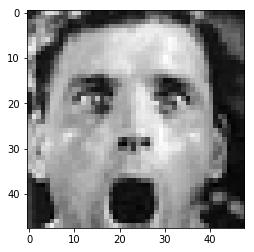

In [7]:
plt.imshow(train_X[29].reshape(48,48),cmap='gist_gray')

In [8]:
from sklearn.utils import shuffle
import tensorflow as tf
def get_batch(X, y, current_batch, batch_size):
    X_batch = X[current_batch * batch_size:(
        current_batch * batch_size + batch_size)]
    y_batch = y[current_batch * batch_size:(
        current_batch * batch_size + batch_size)]
    return X_batch, y_batch

In [ ]:

num_batches = 128
batch_size = 256
epocs = 100

labels = 7
image_size = 2304

x = tf.placeholder(tf.float32, shape=[None, image_size])
W = tf.Variable(tf.zeros([image_size, labels]))
b = tf.Variable(tf.zeros([labels]))
y = tf.matmul(x, W) + b
y_true = tf.placeholder(tf.float32, [None, labels])
cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_true, logits=y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train = optimizer.minimize(cross_entropy)
init = tf.global_variables_initializer()
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_true, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
with tf.Session() as sess:
    sess.run(init)
    for step in range(epocs):
        X, y = shuffle(train_X, train_y)
        for current_batch in range(num_batches):
            batch_X, batch_y = get_batch(X, y, current_batch, batch_size)
            sess.run(train, feed_dict={x: batch_X, y_true: batch_y})
        if step % 10 == 0:
            log(sess.run(accuracy, feed_dict={x: test_X,
                                              y_true: test_y}), "model accuracy:")

    log(sess.run(accuracy, feed_dict={x: test_X,
                                      y_true: test_y}), "Final accuracy: ")

model accuracy:
	
0.182223
model accuracy:
	
0.151017
model accuracy:
	
0.137364
model accuracy:
	
0.289774
model accuracy:
	
0.168849
model accuracy:
	
0.279465
model accuracy:
	
0.28253
model accuracy:
	
0.21956
